In [34]:
import random
import numpy as np
from copulas.multivariate import Multivariate
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
free_parameters = \
{'cov_para_1': 0.4304949449354126, 'cov_para_2': 0.023999436581471967, 'cov_para_3': 0.3636618846468026, 'cov_para_4': 0.12768118634397563, 'cov_para_5': 0.0359770027084112, 'cov_para_6': -0.06919891181499205, 'beta_1a': 7.098217345313439, 'beta_1b': 8.662831035753971, 'beta_2a': 7.857990180717634, 'beta_2b': 14.55426218574646, 'beta_3a': 6.450966566464681, 'beta_3b': 5.562238680310011, 'beta_4a': 6.93595746536513, 'beta_4b': 14.591414013169102, 'lambda_expon_1': 0.08002459226102225, 'lambda_expon_2': 0.03180016250326891, 'lambda_expon_3': 0.027085487595542756}

In [36]:
free_para1 = free_parameters['cov_para_1']
free_para2 = free_parameters['cov_para_2']
free_para3 = free_parameters['cov_para_3']
free_para4 = free_parameters['cov_para_4']
free_para5 = free_parameters['cov_para_5']
free_para6 = free_parameters['cov_para_6']

diag_1 = 1
diag_2 = np.sqrt(1-free_para1**2)
if (1-free_para2**2-free_para3**2)<0:
    diag_3 = np.sqrt(np.abs(1-free_para2**2-free_para3**2))
else:
    diag_3 = np.sqrt(1-free_para2**2-free_para3**2)

if (1-free_para4**2-free_para5**2-free_para6**2)<0:
    diag_4 = np.sqrt(np.abs(1-free_para4**2-free_para5**2-free_para6**2))
else:
    diag_4 = np.sqrt(1-free_para4**2-free_para5**2-free_para6**2)

lower_triangular_matrix = np.asarray([[diag_1,0,0,0],
                        [free_para1,diag_2,0,0],
                        [free_para2,free_para3,diag_3,0],
                        [free_para4,free_para5,free_para6,diag_4]])


cov_matrix = lower_triangular_matrix@lower_triangular_matrix.transpose()


#now, define the marginal distribution of the gaussian copula
univerates = [{'loc': 0,
'scale': 1,
'a': free_parameters['beta_1a'],
'b': free_parameters['beta_1b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_2a'],
'b': free_parameters['beta_2b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_3a'],
'b': free_parameters['beta_3b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_4a'],
'b': free_parameters['beta_4b'],
'type': 'copulas.univariate.beta.BetaUnivariate'}]


#now, we construct the gaussian copula
copula_parameters = {}
copula_parameters['covariance'] = cov_matrix
copula_parameters['univariates'] = univerates
copula_parameters['type'] = 'copulas.multivariate.gaussian.GaussianMultivariate'
copula_parameters['columns'] = [0,1,2,3]

new_dist = Multivariate.from_dict(copula_parameters)

In [37]:
cov_matrix

array([[ 1.        ,  0.43049494,  0.02399944,  0.12768119],
       [ 0.43049494,  1.        ,  0.3385703 ,  0.0874387 ],
       [ 0.02399944,  0.3385703 ,  1.        , -0.04829179],
       [ 0.12768119,  0.0874387 , -0.04829179,  1.        ]])

In [39]:
data_points = pd.DataFrame()
data_points[0] = [0]
data_points[1] = [0.1]
data_points[2] = [0.1]
data_points[3] = [0.1]
data_points

,0,1,2,3
0,0,0.1,0.1,0.1


In [40]:
new_dist.cdf(data_points)

1.6879271121401903e-13

In [41]:
import random

cdfs = []

input_data_points = []
non_trivial_input_data_points = []

for _ in range(0,100):

    f1 = random.uniform(0, 1)
    f2 = random.uniform(0, 1)
    f3 = random.uniform(0, 1)
    f4 = random.uniform(0, 1)
    
    
    
    data_points = pd.DataFrame()
    data_points[0] = [f1]
    data_points[1] = [f2]
    data_points[2] = [f3]
    data_points[3] = [f4]
    
    r = new_dist.cdf(data_points)
    
    cdfs.append(r)
    
    if r<1e-5:
        data_dict = {}
        data_dict[0] = f1
        data_dict[1] = f2
        data_dict[2] = f3
        data_dict[3] = f4
        
        input_data_points.append(data_dict)
    
    if r>0.05:
        data_dict = {}
        data_dict[0] = f1
        data_dict[1] = f2
        data_dict[2] = f3
        data_dict[3] = f4
        
        non_trivial_input_data_points.append(data_dict)
        
input_data_points_df = pd.DataFrame(input_data_points)
non_trivial_input_data_points_df = pd.DataFrame(non_trivial_input_data_points)

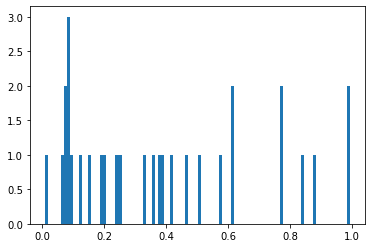

In [43]:
plt.hist(input_data_points_df[0],bins = 100)
plt.show()

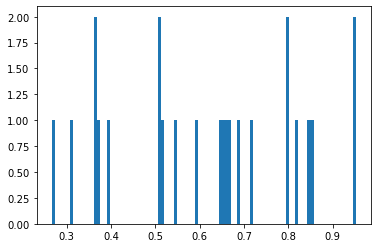

In [44]:
plt.hist(non_trivial_input_data_points_df[0],bins = 100)
plt.show()

In [31]:
input_data_points_df

,0,1,2,3
0,0.328825,0.303943,0.028521,0.337695
1,0.110625,0.828588,0.111729,0.164771
2,0.790503,0.041550,0.285740,0.141511
3,0.143298,0.355246,0.109076,0.866180
4,0.849030,0.125268,0.078716,0.605359
5,0.545717,0.026474,0.983370,0.891035
6,0.693418,0.054184,0.874462,0.088140
7,0.762211,0.365457,0.132796,0.019468
8,0.392652,0.075207,0.841380,0.087940
9,0.474315,0.224957,0.099071,0.169014


In [32]:
non_trivial_input_data_points_df

,0,1,2,3
0,0.408050,0.263297,0.781528,0.846361
1,0.766098,0.355724,0.333333,0.963884
2,0.621274,0.944392,0.791735,0.337044
3,0.488165,0.762226,0.735290,0.292969
4,0.598671,0.429626,0.516052,0.754448
5,0.526244,0.374014,0.685150,0.433889
6,0.326035,0.550518,0.484899,0.480578
7,0.452214,0.832723,0.764820,0.571254
8,0.622137,0.307604,0.843292,0.692235
9,0.704900,0.569753,0.315031,0.791800


In [45]:
import trading_vix
env = trading_vix.trading_vix()

In [46]:
env.index_feature_dataframe

,vix_price_adj_close,vix_adj_close,days_since_5,days_since_6,days_since_7
0,44.680000,10.390000,15,15,148
1,43.720001,10.160000,16,16,149
2,44.320000,10.700000,17,17,150
3,44.799999,11.460000,1,18,151
4,43.279999,10.420000,2,19,152
...,...,...,...,...,...
995,8.190000,20.670000,3,7,80
996,8.080000,20.150000,4,8,81
997,7.710000,18.400000,5,9,82
998,7.710000,18.840000,6,10,83


In [75]:
import random

cdfs = []

input_data_points = []
non_trivial_input_data_points = []

for _ in range(0,1000):

    f1 = random.uniform(0, 1)
    f2 = random.uniform(0, 1)
    f3 = random.uniform(0, 1)
    f4 = random.uniform(0, 1)
    
    
    
    data_points = pd.DataFrame()
    data_points[0] = [f1]
    data_points[1] = [f2]
    data_points[2] = [f3]
    data_points[3] = [0]
    #data_points[3] = [f4]
    
    r = new_dist.cdf(data_points)
    
    cdfs.append(r)
    
    if r<1e-5:
        data_dict = {}
        data_dict[0] = f1
        data_dict[1] = f2
        data_dict[2] = f3
        data_dict[3] = f4
        
        input_data_points.append(data_dict)
    
    if r>0.01:
        data_dict = {}
        data_dict[0] = f1
        data_dict[1] = f2
        data_dict[2] = f3
        data_dict[3] = f4
        
        non_trivial_input_data_points.append(data_dict)
        
input_data_points_df = pd.DataFrame(input_data_points)
non_trivial_input_data_points_df = pd.DataFrame(non_trivial_input_data_points)

In [76]:
input_data_points_df.shape

(1000, 4)

In [77]:
non_trivial_input_data_points_df.shape

(0, 0)

In [73]:
holding_position = 0.0
min_transformed_holding = 0.1
transformed_holding = min_transformed_holding*np.exp(np.log(1.0/min_transformed_holding)*holding_position)
transformed_holding = np.reshape(transformed_holding,(1,1))

In [74]:
transformed_holding

array([[0.1]])